# A2Z Insurance 

## General Context

Finding new customers is vital in every industry. The process for finding new
customers begins by learning as much as possible from the existing customers.
Understanding current customers allow organizations to identify groups of
customers that have different product interests, different market
participation, or different response to marketing efforts. With this, we will
be able not only to serve better our customers, but also to improve the
targeting of prospective customers.

Market segmentation, the process of identifying customers’ groups, makes use
of geographic, demographic, psychographic, and behavioral characteristics of
customers. By understanding the differences between the different segments,
organizations can make better strategic choices about opportunities, product
definition, positioning, promotions, pricing, and target marketing.

## Business Situation

A2Z Insurance (A2Z) is a portuguese long standing insurance company that
serves a wide array of insurance services: Motor, Household, Health, Life and
Work Compensation. Although A2Z primarily serves portuguese customers, a
significant portion of their customer acquisition comes from their web site.
Customers can sign up to A2Z services through their branches, by telephone, or
on the web site.

In 2016, A2Z became one of the largest insurers in Portugal. However, the lack
of a data driven culture in the company ultimately led to poorly maintained
databases over the years. A2Z is trying to make better use of the database it
has regarding its customers. So far, it has simply mass-marketed everything.
All potential and existing customers get the same promotions, and there are no
attempts to identify target markets for cross-selling opportunities. Now, A2Z
wants start differentiating customers, and developing more focused programs.

A2Z provided you an ABT (Analytic Based Table) with data regarding a sample of
10.290 Customers from its active database. These are customers that had at
least one insurance service with the company at the time the dataset was
extracted. Your job is to segment the database and find the relevant clusters
of customers. To do this, we suggest you segment the customers using different
perspectives and approaches, as well as combine and analyze the results. A2Z
would like to understand the value and demographics of each customer segment,
as well as understand which types of insurance they will be more interested in
buying.

## Metadata

| Variable 		      | Description                              | Additional Information |
|---------------------|------------------------------------------|------------------------|
| ID 		          | ID 		                                 |                        |
| First Policy 		  | Year of the customer’s first policy      | (1)                    |
| Birthday            | Customer’s Birthday Year                 | (2)                    |
| Education           | Academic Degree                          |                        |
| Salary              | Gross monthly salary (€) 		         |                        |
| Area 		          | Living area 		                     | (3)                    |
| Children 		      | Binary variable (Y=1) 		             |                        |
| CMV 		          | Customer Monetary Value 		         | (4)                    |
| Claims 		      | Claims Rate 		                     | (5)                    |
| Motor 		      | Premiums (€) in LOB: Motor 		         | (6)                    |
| Household 		  | Premiums (€) in LOB: Household 		     | (6)                    |
| Health 		      | Premiums (€) in LOB: Health 		     | (6)                    |
| Life 		          | Premiums (€) in LOB: Life 		         | (6)                    |
| Work Compensation   | Premiums (€) in LOB: Work Compensations  | (6)                    |

## Additional Information

1. May be considered as the first year as a customer
2. The current year of the database is 2016
3. No further information provided about the meaning of the area codes
4. Lifetime value = (annual profit from the customer) X (number of years that they are a customer) - (acquisition cost)
5. Amount paid by the insurance company (€)/ Premiums (€) Note: in the last 2 years
6. Annual Premiums (2016). Negative premiums may manifest reversals occurred in the current year, paid in previous one(s).

Notice the data was stored in a SAS database file. There may be some intricacies when
reading this file type using Python. Make sure the data is being
imported properly and that you remove (before or after converting it to a
pandas data frame) any irrelevant rows/columns you may find.

## Expected outcomes

1. Explore the data and identify the variables that should be used to segment customers.
2. Identify customer segments
3. Justify the number of clusters you chose (taking in consideration the business use as well).
4. Explain the clusters found.
5. Suggest business applications for the findings and define general marketing
   approaches for each cluster.

**Note:** Invest time into evaluating your preprocessing pipeling, thinking
how you want to do your clustering, possible approaches, and advantages or
disadvantages of different decisions.


---

### Terms to clarify

* **Premiums**: The amount you pay for your health insurance every month. (https://www.healthcare.gov/glossary/premium/)
* **Line of Business (LOB)**: Line of business is a general classification of business used by the insurance industry, such as Motor, Household, Health, Life or Work Compensation.

### Outlier handling

| Variable 		      | Description                              | Outlier Handling                                                         | Outlier Count |
|---------------------|------------------------------------------|--------------------------------------------------------------------------|---------------|
| ID 		          | ID 		                                 |  -                                                                       |   -           |
| First Policy 		  | Year of the customer’s first policy      |  outlier which doesn't make any sense (53784.0) - drop observation       |   1           |
| Birthday            | Customer’s Birthday Year                 |  maybe a typo for 1028. 9 & 0 is next to each other on the keyboard      |   1           |
| Education           | Academic Degree                          |  -                                                                       |   -           |
| Salary              | Gross monthly salary (€) 		         |  keep outliers at first and check performance with/without               |   2           |
| Area 		          | Living area 		                     |  -                                                                       |   -           |
| Children 		      | Binary variable (Y=1) 		             |  -                                                                       |   -           |
| CMV 		          | Customer Monetary Value 		         | probably IQR-Method. how high can acquisition costs be? (-165k)          |   110         |
| Claims 		      | Claims Rate 		                     | negative correlation with CMV (-0.992622). drop CMV since feature has 110 IQR outliers (ClaimsRate only 15) and apply IQR to ClaimsRate   |   15          |
| Motor 		      | Premiums (€) in LOB: Motor 		         |                    |
| Household 		  | Premiums (€) in LOB: Household 		     |                    |
| Health 		      | Premiums (€) in LOB: Health 		     |                    |
| Life 		          | Premiums (€) in LOB: Life 		         |                    |
| Work Compensation   | Premiums (€) in LOB: Work Compensations  |                    |

<br>

### Data inconsistency

* FirstPolYear < BirthYear
    1. swap values
    2. try to knn-impute outliers and check if the imputer would suggest significantly other values (helps for half of the values)

<br>

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_sas('a2z_insurance.sas7bdat', index = 'CustID')

---
### Exploratory Data Analysis

In [3]:
df

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
1.0,1985.0,1982.0,b'2 - High School',2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
2.0,1981.0,1995.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
3.0,1991.0,1970.0,b'1 - Basic',2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
4.0,1990.0,1981.0,b'3 - BSc/MSc',1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
5.0,1986.0,1973.0,b'3 - BSc/MSc',1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10292.0,1984.0,1949.0,b'4 - PhD',3188.0,2.0,0.0,-0.11,0.96,393.74,49.45,173.81,9.78,14.78
10293.0,1977.0,1952.0,b'1 - Basic',2431.0,3.0,0.0,1405.60,0.00,133.58,1035.75,143.25,12.89,105.13
10294.0,1994.0,1976.0,b'3 - BSc/MSc',2918.0,1.0,1.0,524.10,0.21,403.63,132.80,142.25,12.67,4.89


In [4]:
df.dtypes

FirstPolYear     float64
BirthYear        float64
EducDeg           object
MonthSal         float64
GeoLivArea       float64
Children         float64
CustMonVal       float64
ClaimsRate       float64
PremMotor        float64
PremHousehold    float64
PremHealth       float64
PremLife         float64
PremWork         float64
dtype: object

In [5]:
pd.concat([df.isnull().sum(),df.eq('').sum()],keys=['Nulls','Empty Strings'],axis=1)

,Nulls,Empty Strings
FirstPolYear,30,0
BirthYear,17,0
EducDeg,17,0
MonthSal,36,0
GeoLivArea,1,0
Children,21,0
CustMonVal,0,0
ClaimsRate,0,0
PremMotor,34,0
PremHousehold,0,0


In [6]:
df.duplicated().sum()

3

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
FirstPolYear,10266.0,1991.062634,511.267913,1974.00,1980.00,1986.00,1992.0000,53784.00
BirthYear,10279.0,1968.007783,19.709476,1028.00,1953.00,1968.00,1983.0000,2001.00
MonthSal,10260.0,2506.667057,1157.449634,333.00,1706.00,2501.50,3290.2500,55215.00
GeoLivArea,10295.0,2.709859,1.266291,1.00,1.00,3.00,4.0000,4.00
Children,10275.0,0.706764,0.455268,0.00,0.00,1.00,1.0000,1.00
CustMonVal,10296.0,177.892605,1945.811505,-165680.42,-9.44,186.87,399.7775,11875.89
ClaimsRate,10296.0,0.742772,2.916964,0.00,0.39,0.72,0.9800,256.20
PremMotor,10262.0,300.470252,211.914997,-4.11,190.59,298.61,408.3000,11604.42
PremHousehold,10296.0,210.431192,352.595984,-75.00,49.45,132.80,290.0500,25048.80
PremHealth,10253.0,171.580833,296.405976,-2.11,111.80,162.81,219.8200,28272.00


---
Histogram and boxlots BEFORE outlier removal via IQR-Method

In [8]:
sns.set()

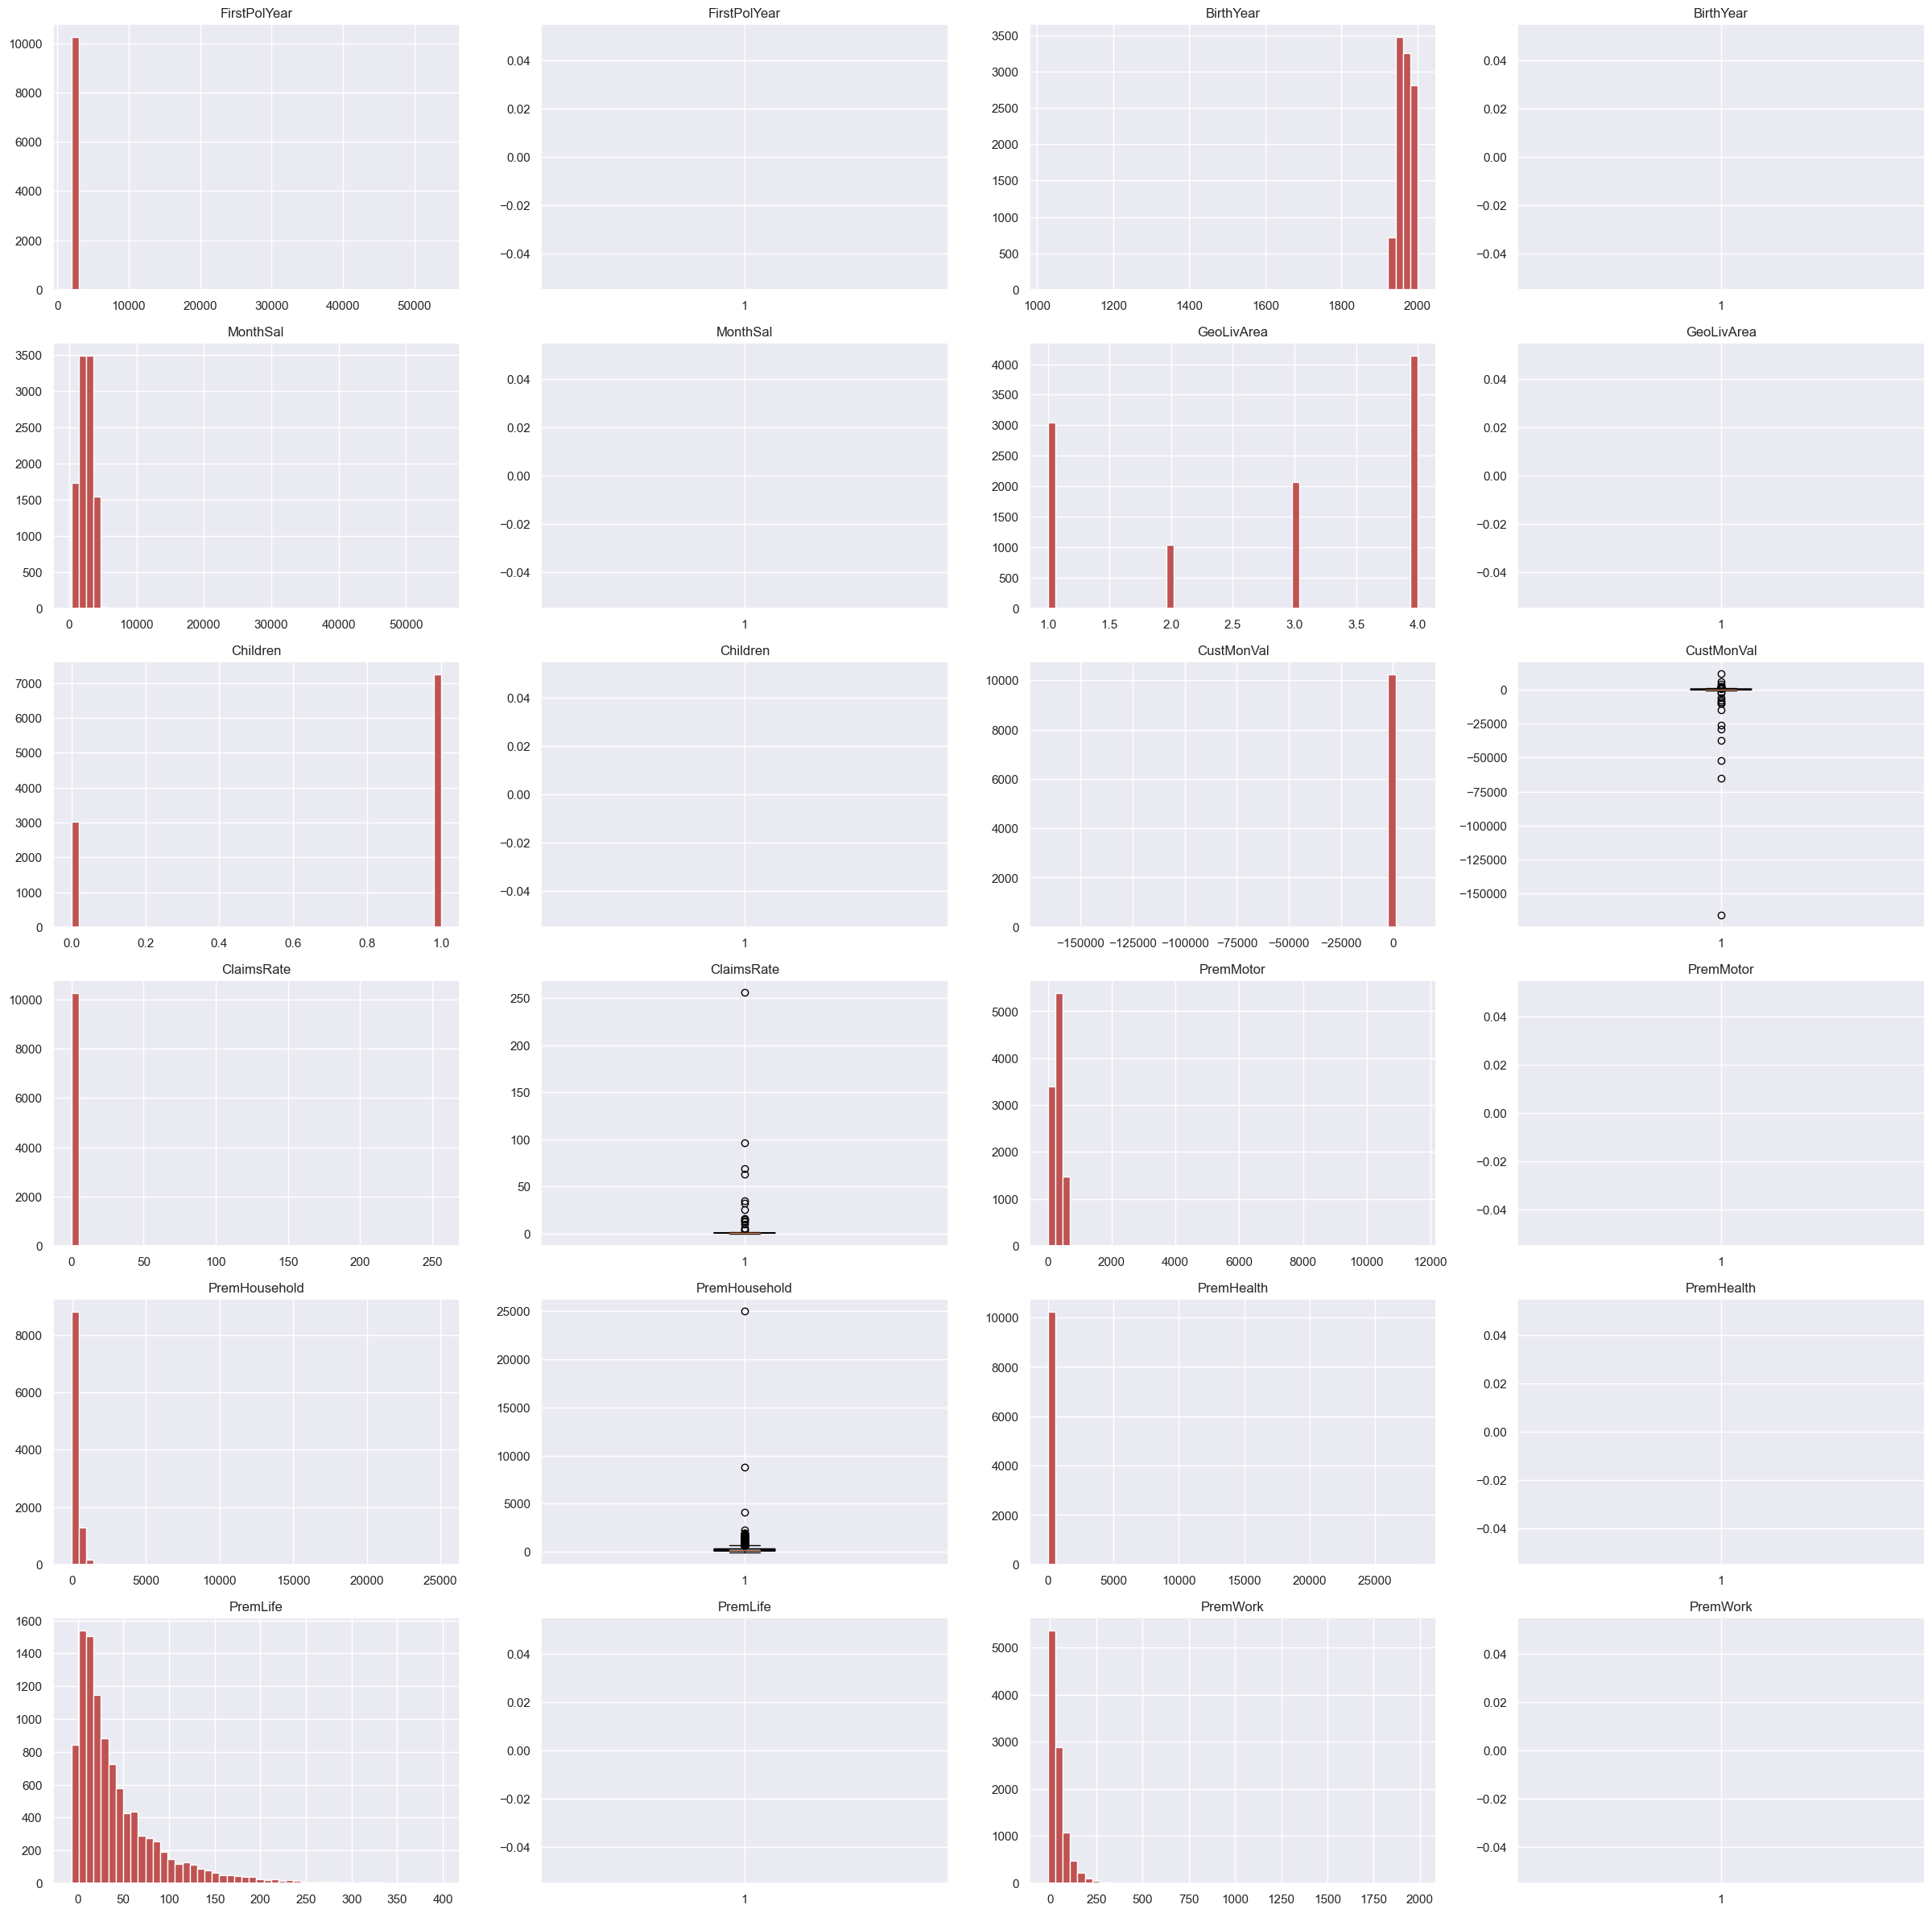

In [9]:
df_numeric_features = list(df.select_dtypes(include = np.number).columns)

fig, ax = plt.subplots(math.ceil(len(df_numeric_features)/2),4, figsize = (30,30))
ax_flat1 = list(ax.flatten())[::2]
ax_flat2 = list(ax.flatten())[1::2]
for i, feat in zip(range(len(ax_flat1)), df_numeric_features):
    ax_flat1[i].hist(df[feat], bins = 50, color = '#bf5252')
    ax_flat2[i].boxplot(df[feat], notch = True, patch_artist = True)
    ax_flat1[i].set_title(feat)
    ax_flat2[i].set_title(feat)

plt.show()

---
Histogram and boxlots after outlier removal via IQR-Method

In [10]:
def inter_quartile_range(input_, cap = False):
    '''
    Removes outliers of column/dataframe via IQR (inter quartile range) method
    If cap == True --> floor/cap method
    '''

    if isinstance(input_, pd.Series):
        q1, q3 = np.nanquantile(input_, 0.25), np.nanquantile(input_, 0.75)
        iqr = q3 - q1
        lower_bound, upper_bound = q1-(1.5*iqr), q3+(1.5*iqr)

        if cap == False:
            return input_[input_.between(lower_bound, upper_bound, inclusive='both')]

        elif cap == True:
            return [lower_bound if i < lower_bound else upper_bound if i > upper_bound else i for i in input_]

    if isinstance(input_, pd.DataFrame):
        numeric_features = list(input_.select_dtypes(include = np.number).columns)

        if cap == False:
            rows_to_drop = set()
            for col in numeric_features:
                q1, q3 = np.nanquantile(input_[col], 0.25), np.nanquantile(input_[col], 0.75)
                iqr = q3 - q1
                lower_bound, upper_bound = q1-(1.5*iqr), q3+(1.5*iqr)
                rows_to_drop.update(input_[~input_[col].between(lower_bound, upper_bound, inclusive='both')].index)
            return input_.loc[~input_.index.isin(list(rows_to_drop))]

        if cap == True:
            for col in numeric_features:
                q1, q3 = np.nanquantile(input_[col], 0.25), np.nanquantile(input_[col], 0.75)
                iqr = q3 - q1
                lower_bound, upper_bound = q1-(1.5*iqr), q3+(1.5*iqr)
                input_[col] = [lower_bound if i < lower_bound else upper_bound if i > upper_bound else i for i in input_[col]]
            return input_

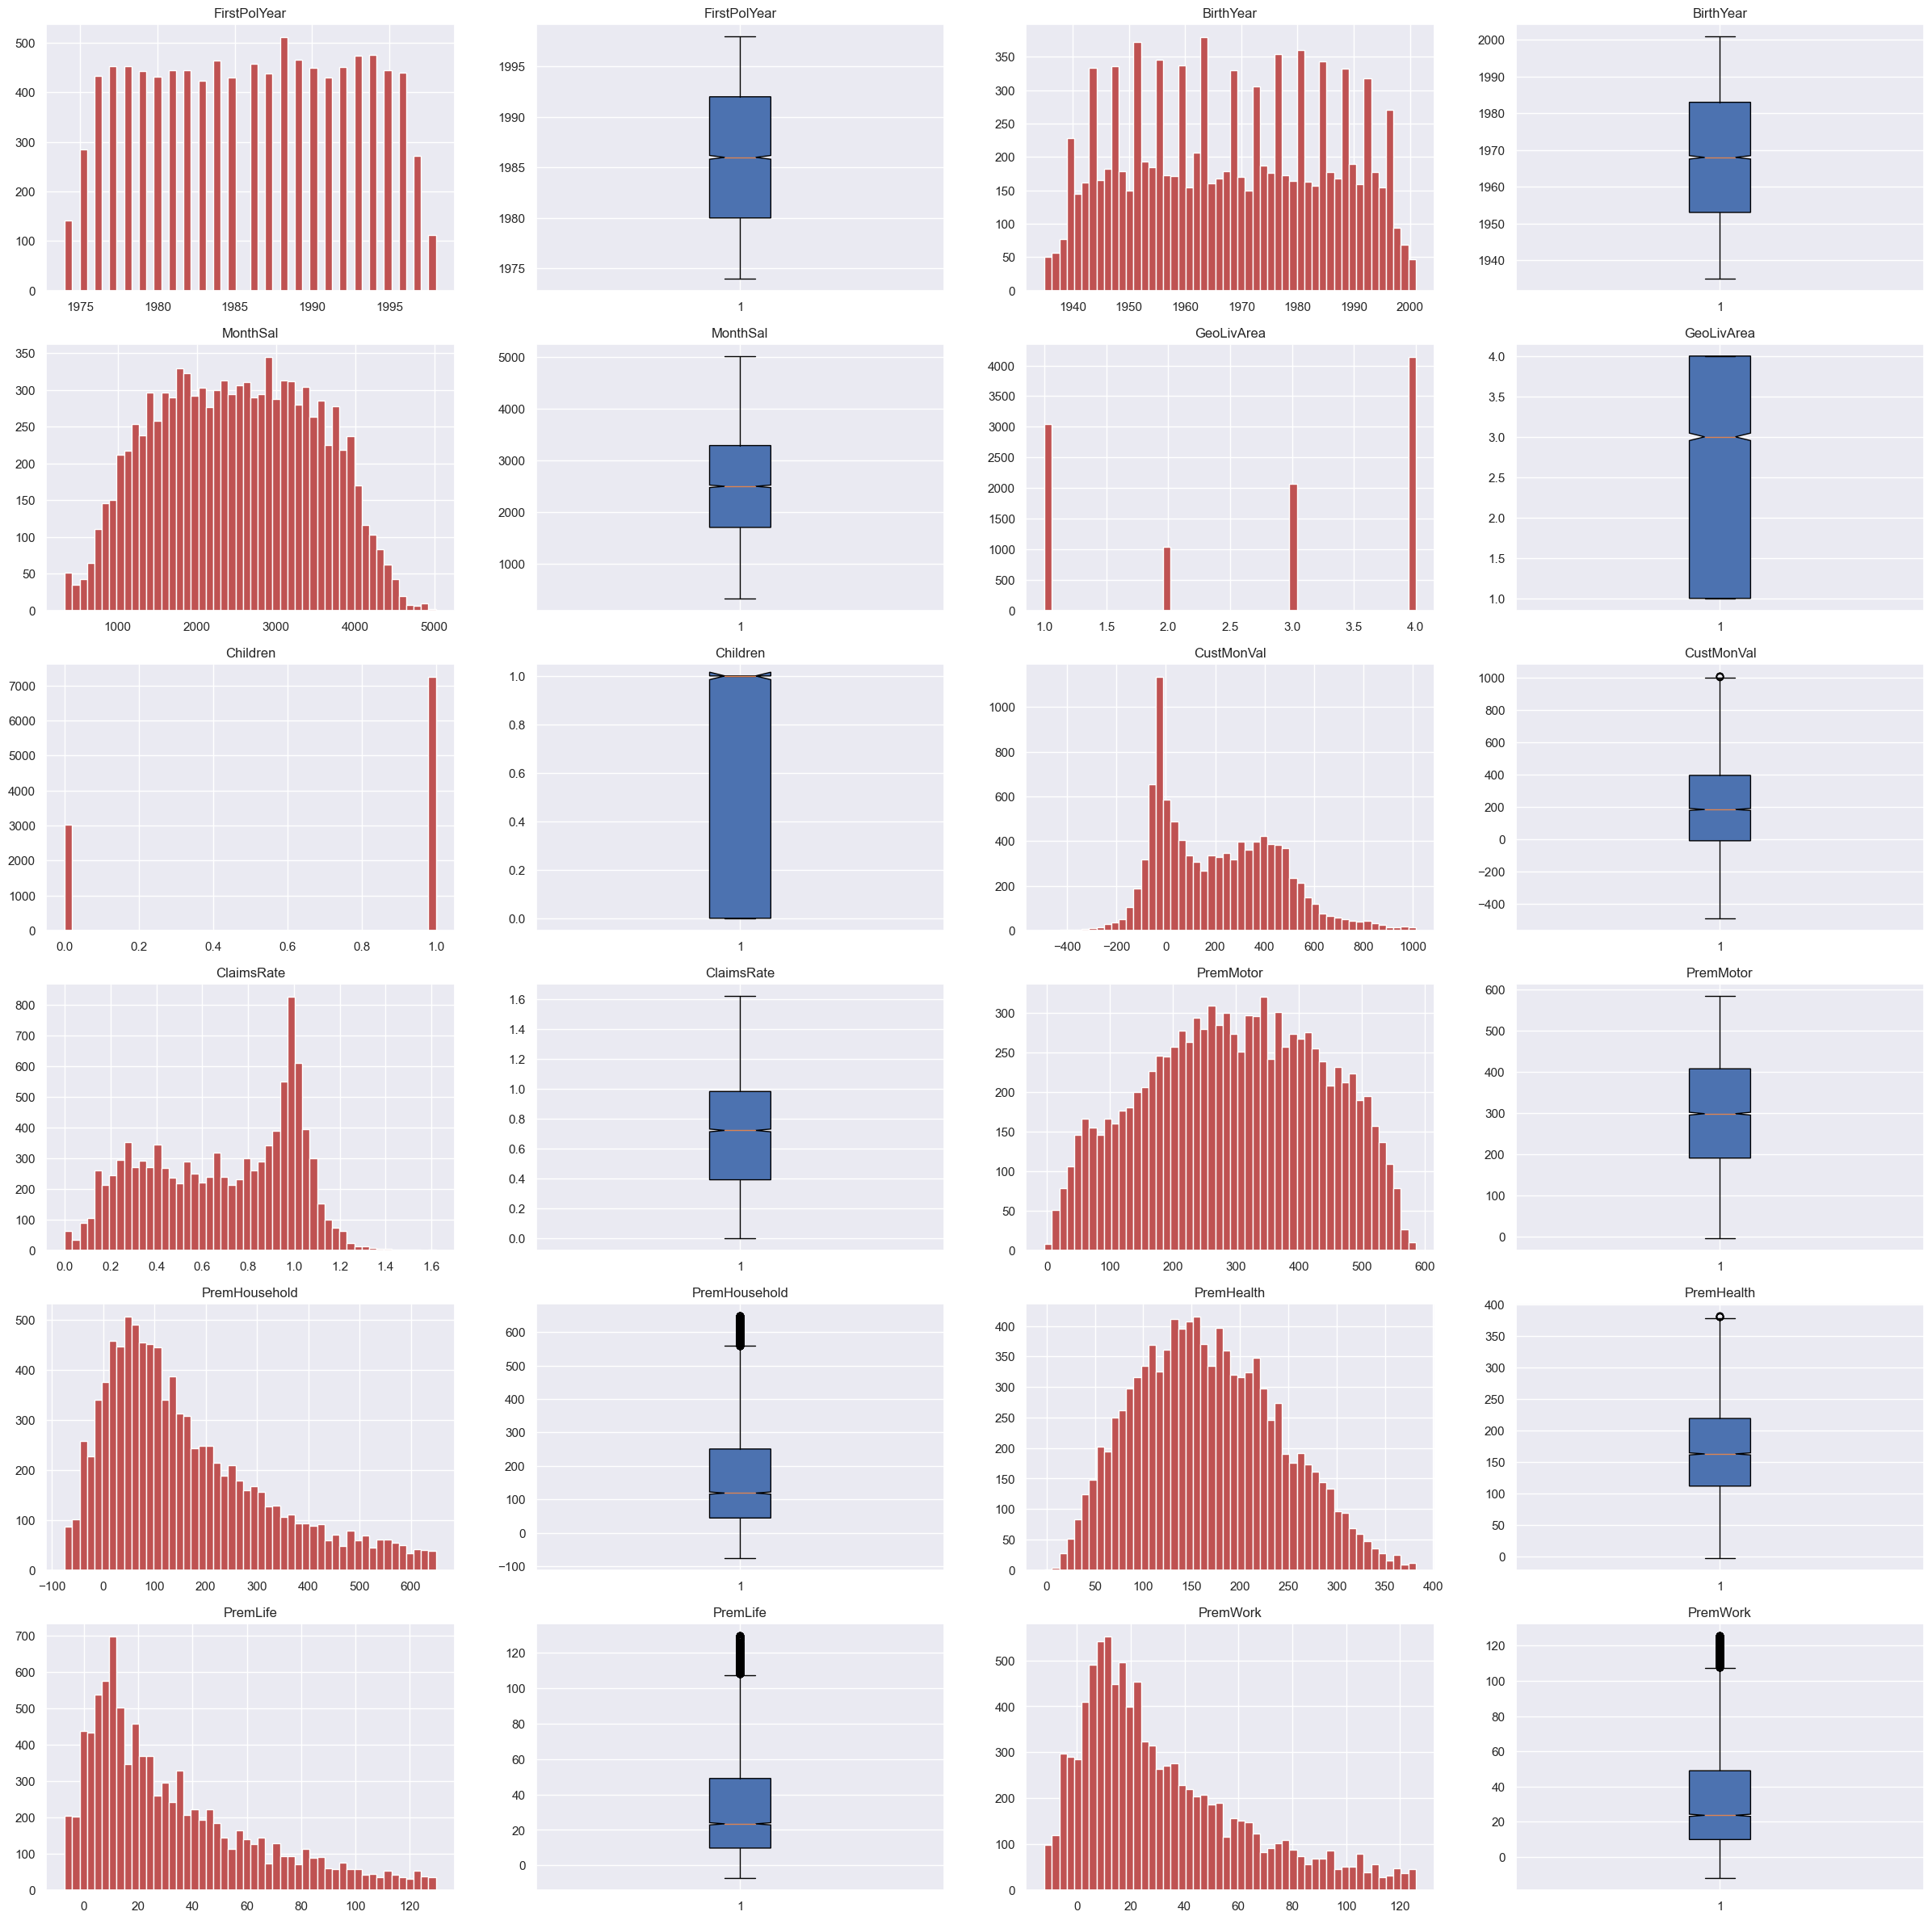

In [11]:
fig, ax = plt.subplots(math.ceil(len(df_numeric_features)/2),4, figsize = (30,30))
ax_flat1 = list(ax.flatten())[::2]
ax_flat2 = list(ax.flatten())[1::2]
for i, feat in zip(range(len(ax_flat1)), df_numeric_features):
    ax_flat1[i].hist(inter_quartile_range(df[feat]), bins = 50, color = '#bf5252')
    ax_flat2[i].boxplot(inter_quartile_range(df[feat]), notch = True, patch_artist = True)
    ax_flat1[i].set_title(feat)
    ax_flat2[i].set_title(feat)

plt.show()

In [12]:
# sns.pairplot(inter_quartile_range(df))
# plt.show()

---
### Encode EducDeg

In [13]:
#rewrite education to make it a numerical variable
df["EducDeg"] = [4 if "PhD" in str(i) else 3 if "BSc" in str(i)  else 2 if "High School" in str(i) else 1 for i in df['EducDeg']]

---
### Handling Missing Values

In [14]:
#Scale the data for the imputation
scaler=RobustScaler().fit(df)
df_scaled=pd.DataFrame(scaler.transform(X=df), index = df.index ,columns = df.columns)

#Impute Values
fill_NaN = KNNImputer(missing_values=np.nan)
imputed_DF = pd.DataFrame(fill_NaN.fit_transform(df_scaled),columns=df.columns, index=df.index )

#rescale the values
df=pd.DataFrame(scaler.inverse_transform(imputed_DF),index = df.index ,columns = df.columns)

#change dtypes
for col in ['FirstPolYear', 'BirthYear', 'EducDeg', 'GeoLivArea', 'Children']:
    df[col] = [round(i) for i in df[col]]

---
### Logic Evaluation

<u>FirstPolYear</u>
- drop entire column
1. invalid values
2. correlation non existend

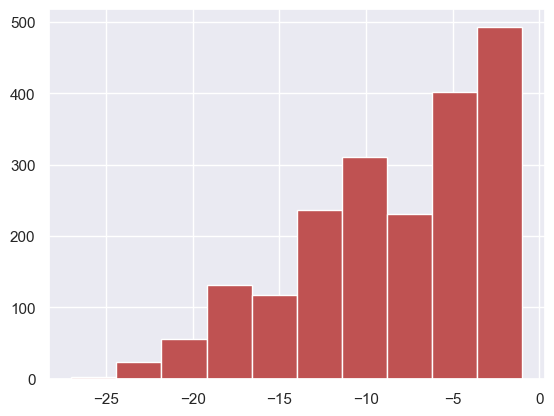

In [15]:
# invalid values
# FirstPolYear can't be smaller than BirthYear. this would indicate having a policy before being born

policy_before_birth = df[df.FirstPolYear < df.BirthYear].FirstPolYear - df[df.FirstPolYear < df.BirthYear].BirthYear
plt.hist(policy_before_birth, color = '#bf5252')
plt.show()

In [16]:
# correlation non existend

df.corr(method = 'spearman')['FirstPolYear'].sort_values(ascending=False)

FirstPolYear     1.000000
MonthSal         0.022394
CustMonVal       0.014372
PremWork         0.014320
PremLife         0.011977
PremHealth       0.011256
PremHousehold    0.008548
GeoLivArea      -0.003426
EducDeg         -0.004430
ClaimsRate      -0.012398
Children        -0.014077
PremMotor       -0.014767
BirthYear       -0.018684
Name: FirstPolYear, dtype: float64

In [17]:
# drop column
df.drop(columns=['FirstPolYear'], inplace=True)

# # define clean dataframe
# df_clean = df[df.FirstPolYear > df.BirthYear]

# # scaler
# scl = RobustScaler()
# df_clean_scaled = pd.DataFrame(scl.fit_transform(df_clean), columns = df_clean.columns, index = df_clean.index)

# # fit imputer on clean dataset
# imputer = KNNImputer()
# imputer.fit(df_clean_scaled)

# df_to_modify = df.copy()
# df_to_modify['FirstPolYear']    = [np.nan if i < j else i for i, j in zip(df.FirstPolYear, df.BirthYear)]
# df_to_modify['BirthYear']       = [np.nan if i < j else j for i, j in zip(df.FirstPolYear, df.BirthYear)]

# # scale whole dataset
# df_scaled = pd.DataFrame(scl.transform(df_to_modify), columns = df_to_modify.columns, index = df_to_modify.index)

# # impute whole dataset
# df_imputed = pd.DataFrame(imputer.transform(df_scaled), columns = df_scaled.columns, index = df_scaled.index)

# # reverse scale
# df_final = pd.DataFrame(scl.inverse_transform(df_imputed), columns = df_imputed.columns, index = df_imputed.index)

# for col in ['FirstPolYear', 'BirthYear', 'EducDeg', 'GeoLivArea', 'Children']:
#     df_final[col] = [round(i) for i in df_final[col]]

# df_final['age'] = [2016 - by for by in df_final.BirthYear]

<u>BirthYear</u>

- Inconsistency Hyopthesis: there could be values in "Birth Year" which are bigger than 2016. 
- Not the case but there are 116 (1% of dataset) customers which are underage
- We assume that children are insured via their parents and therefore drop these rows

In [18]:
print(df[(2016-df["BirthYear"])<18].shape[0], "Customers are underage")
df=df[(2016-df["BirthYear"])>17]

116 Customers are underage


<u>TotalPrem</u>

- Inconsistency Hyopthesis: there could be customers who spend more on their annual premiums than they earn in one month 
- We assume that this is the result of a miscalculation and therefore we drop the respective rows (1)

In [19]:
df["TotalPrem"]=df[['PremMotor', 'PremHousehold', 'PremHealth','PremLife', 'PremWork']].sum(axis = 1)
df=df[df["TotalPrem"] < df["MonthSal"]*12]

---
### Outlier handling

<u>Salary & BirthYear</u>
- drop outlier observations (3 in total)

In [20]:
q25 = df.MonthSal.quantile(.25)
q75 = df.MonthSal.quantile(.75)
iqr = (q75 - q25)

sal_upper_lim = q75 + 1.5 * iqr
sal_lower_lim = q25 - 1.5 * iqr

Salary_out = df[(df["MonthSal"]>sal_upper_lim) | (df["MonthSal"]<sal_lower_lim)]
print(f'MonthSal outliers: {len(Salary_out)}')

q25 = df.BirthYear.quantile(.25)
q75 = df.BirthYear.quantile(.75)
iqr = (q75 - q25)

birth_upper_lim = q75 + 1.5 * iqr
birth_lower_lim = q25 - 1.5 * iqr

Birthday_out = df[(df["BirthYear"]>birth_upper_lim) | (df["BirthYear"]<birth_lower_lim)]
print(f'BirthYear outliers: {len(Birthday_out)}')

MonthSal outliers: 2
BirthYear outliers: 1


In [21]:
# excute decision-making for MonthSal & BirthYear
df = df[df.MonthSal.between(sal_lower_lim,sal_upper_lim)]

df = df[df.BirthYear.between(birth_lower_lim,birth_upper_lim)]

<u>ClaimsRate & CustMonVal</u>
- since ClaimsRate is highly correlated with CustMonVal (-0.992622) we're going to drop the column with more outliers (CustMonVal).
- subsequently we're going to drop the 15 outlier observations from ClaimsRate

In [22]:
# outlier ClaimsRate

q25 = df.ClaimsRate.quantile(.25)
q75 = df.ClaimsRate.quantile(.75)
iqr = (q75 - q25)

claim_upper_lim = q75 + 1.5 * iqr
claim_lower_lim = q25 - 1.5 * iqr

ClaimsRate_out = df[(df["ClaimsRate"]>claim_upper_lim) | (df["ClaimsRate"]<claim_lower_lim)]
print(f'ClaimsRate outliers: {len(ClaimsRate_out)}')

# outlier CustMonVal

q25 = df.CustMonVal.quantile(.25)
q75 = df.CustMonVal.quantile(.75)
iqr = (q75 - q25)

cust_upper_lim = q75 + 1.5 * iqr
cust_lower_lim = q25 - 1.5 * iqr

CustMonVal_out = df[(df["CustMonVal"]>cust_upper_lim) | (df["CustMonVal"]<cust_lower_lim)]
print(f'CustMonVal outliers: {len(CustMonVal_out)}')

ClaimsRate outliers: 15
CustMonVal outliers: 102


In [23]:
df.corr()['ClaimsRate'].sort_values(ascending=False)

ClaimsRate       1.000000
PremHealth       0.015285
GeoLivArea       0.007694
BirthYear        0.005808
EducDeg          0.005040
PremLife         0.001527
PremWork        -0.001025
Children        -0.002291
MonthSal        -0.004262
TotalPrem       -0.006475
PremMotor       -0.006734
PremHousehold   -0.007523
CustMonVal      -0.992719
Name: ClaimsRate, dtype: float64

In [24]:
df

,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,TotalPrem
CustID,,,,,,,,,,,,,
1.0,1982,2,2177.0,1,1,380.97,0.39,375.85,79.45,146.36,47.01,16.89,665.56
2.0,1995,2,677.0,4,1,-131.13,1.12,77.46,416.20,116.69,194.48,106.13,910.96
3.0,1970,1,2277.0,3,0,504.67,0.28,206.15,224.50,124.58,86.35,99.02,740.60
4.0,1981,3,1099.0,4,1,-16.99,0.99,182.48,43.35,311.17,35.34,28.34,600.68
5.0,1973,3,1763.0,4,1,35.23,0.90,338.62,47.80,182.59,18.78,41.45,629.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10292.0,1949,4,3188.0,2,0,-0.11,0.96,393.74,49.45,173.81,9.78,14.78,641.56
10293.0,1952,1,2431.0,3,0,1405.60,0.00,133.58,1035.75,143.25,12.89,105.13,1430.60
10294.0,1976,3,2918.0,1,1,524.10,0.21,403.63,132.80,142.25,12.67,4.89,696.24


In [25]:
# excute decision-making for ClaimsRate & CustMonVal
df = df[df.ClaimsRate.between(claim_lower_lim, claim_upper_lim)]

df = df.drop(columns=['CustMonVal'])

<u>Premium columns</u>
- there are 3 columns with 600+ outliers. since droping these observations would end up in a large information loss we need to find another solution. droping columns due to high correlation isn't possible here so we're are flooring and capping these 3 columns. 
- regarding the other 2 columns (PremMotor & PremHealth) we just drop the outlier observations

In [26]:
d = {}
lims = {}
for col in ['PremMotor', 'PremHousehold', 'PremHealth', 'PremLife', 'PremWork']:
    q25 = df[col].quantile(.25)
    q75 = df[col].quantile(.75)
    iqr = (q75 - q25)

    upper_lim = q75 + 1.5 * iqr
    lower_lim = q25 - 1.5 * iqr

    lims[col] = (lower_lim, upper_lim)

    outlier_count = df[(df[col]>upper_lim) | (df[col]<lower_lim)]
    if len(outlier_count) > 600:
        d[col+'_outlier'] = set(outlier_count.index)
    print(f'{col} outliers: {len(outlier_count)}')

PremMotor outliers: 6
PremHousehold outliers: 610
PremHealth outliers: 24
PremLife outliers: 611
PremWork outliers: 620


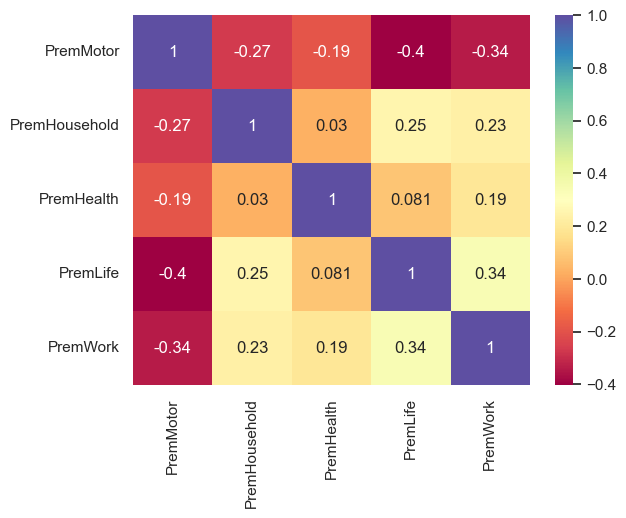

In [27]:
prem_corr = df.corr()
prem_corr = prem_corr[['PremMotor', 'PremHousehold', 'PremHealth', 'PremLife', 'PremWork']]
sns.heatmap(prem_corr.loc[['PremMotor', 'PremHousehold', 'PremHealth', 'PremLife', 'PremWork']], annot=True, cmap = 'Spectral')
plt.show()

In [28]:
df = df[df.PremMotor.between(lims['PremMotor'][0],lims['PremMotor'][1])]
df = df[df.PremHealth.between(lims['PremHealth'][0],lims['PremHealth'][1])]

for col in ['PremHousehold', 'PremLife', 'PremWork']:
    df[col] = inter_quartile_range(df[col], cap=True)
    
    
    

# Association Rule Mining
## 

In [29]:
#pip install apyori
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules


df_ass = df.copy()
df_ass=df_ass[['PremMotor', 'PremHousehold', 'PremHealth', 'PremLife', 'PremWork']]

for i in range(df_ass.shape[0]):
    for j in range(df_ass.shape[1]):
        if df_ass.iloc[i,j] != 0: 
            df_ass.iloc[i,j] = 1
        else:
            df_ass.iloc[i,j] = 0

df_a = apriori(df_ass, use_colnames = True, verbose = 1)#, min_support = 0.2, use_colnames = True, verbose = 1)


df_ar = association_rules(df_a, metric = "confidence", min_threshold = 0.6)
df_ar

,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,
1.0,1.0,1.0,1.0,1.0,1.0
2.0,1.0,1.0,1.0,1.0,1.0
3.0,1.0,1.0,1.0,1.0,1.0
4.0,1.0,1.0,1.0,1.0,1.0
5.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...
10292.0,1.0,1.0,1.0,1.0,1.0
10293.0,1.0,1.0,1.0,1.0,1.0
10294.0,1.0,1.0,1.0,1.0,1.0


Processing 5 combinations | Sampling itemset size 5


C:\Users\david\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PremHousehold),(PremMotor),0.994079,1.000000,0.994079,1.000000,1.0,0.0,inf
1,(PremMotor),(PremHousehold),1.000000,0.994079,0.994079,0.994079,1.0,0.0,1.0
2,(PremHealth),(PremMotor),1.000000,1.000000,1.000000,1.000000,1.0,0.0,inf
3,(PremMotor),(PremHealth),1.000000,1.000000,1.000000,1.000000,1.0,0.0,inf
4,(PremLife),(PremMotor),1.000000,1.000000,1.000000,1.000000,1.0,0.0,inf
...,...,...,...,...,...,...,...,...,...
175,(PremHealth),"(PremWork, PremLife, PremHousehold, PremMotor)",1.000000,0.994079,0.994079,0.994079,1.0,0.0,1.0
176,(PremWork),"(PremLife, PremHealth, PremHousehold, PremMotor)",1.000000,0.994079,0.994079,0.994079,1.0,0.0,1.0
177,(PremLife),"(PremWork, PremHealth, PremHousehold, PremMotor)",1.000000,0.994079,0.994079,0.994079,1.0,0.0,1.0
178,(PremHousehold),"(PremWork, PremLife, PremHealth, PremMotor)",0.994079,1.000000,0.994079,1.000000,1.0,0.0,inf


---
### PCA

In [31]:
df_pca = df.copy()

In [32]:
scaler = RobustScaler()
df_pca = pd.DataFrame(scaler.fit_transform(df_pca), columns=df_pca.columns, index = df_pca.index)
df_pca.head(5)

,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,TotalPrem
CustID,,,,,,,,,,,,
1.0,0.517241,-1.0,-0.220871,-0.666667,0.0,-0.559322,0.346576,-0.222293,-0.154737,0.484389,-0.190180,-0.161157
2.0,0.965517,-1.0,-1.181178,0.333333,0.0,0.677966,-1.059929,1.210381,-0.431975,2.179532,1.792491,1.104783
3.0,0.103448,-2.0,-0.156850,0.000000,-1.0,-0.745763,-0.453330,0.394810,-0.358251,1.337381,1.634526,0.225950
4.0,0.482759,0.0,-0.911012,0.333333,0.0,0.457627,-0.564902,-0.375877,1.385255,0.231353,0.064208,-0.495852
5.0,0.206897,0.0,-0.485915,0.333333,0.0,0.305085,0.171086,-0.356945,0.183797,-0.127710,0.355477,-0.348520


In [33]:
def principal_component_analysis(dataframe, var_treshold=0.8):
    '''
    Creates and add n principal n_components (dependent on variance treshold)
    '''

    pca = PCA()
    pca_feat = pca.fit_transform(dataframe)
    nr_of_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) > var_treshold) + 1

    pca = PCA(n_components=nr_of_components)
    pca_feat = pca.fit_transform(dataframe)
    pca_feat_names = [f'PC{i}' for i in range(pca.n_components_)]
    pca_df = pd.DataFrame(pca_feat, index=dataframe.index, columns=pca_feat_names)

    dataframe = pd.concat([dataframe, pca_df], axis=1)

    return dataframe

In [34]:
df_pca = principal_component_analysis(df_pca)

In [35]:
df_pca.head(5)

,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,TotalPrem,PC0,PC1,PC2,PC3,PC4
CustID,,,,,,,,,,,,,,,,,
1.0,0.517241,-1.0,-0.220871,-0.666667,0.0,-0.559322,0.346576,-0.222293,-0.154737,0.484389,-0.190180,-0.161157,-0.548079,-0.072396,-0.736790,-0.363384,0.461965
2.0,0.965517,-1.0,-1.181178,0.333333,0.0,0.677966,-1.059929,1.210381,-0.431975,2.179532,1.792491,1.104783,2.133892,-2.055391,-1.181225,-0.124705,-0.698977
3.0,0.103448,-2.0,-0.156850,0.000000,-1.0,-0.745763,-0.453330,0.394810,-0.358251,1.337381,1.634526,0.225950,0.849701,-1.692937,0.020292,-1.340003,-0.258266
4.0,0.482759,0.0,-0.911012,0.333333,0.0,0.457627,-0.564902,-0.375877,1.385255,0.231353,0.064208,-0.495852,-0.722757,-0.734706,-0.353264,1.731538,0.609250
5.0,0.206897,0.0,-0.485915,0.333333,0.0,0.305085,0.171086,-0.356945,0.183797,-0.127710,0.355477,-0.348520,-0.883471,0.032627,-0.482276,0.586153,-0.032746


---
### Clustering

In [36]:
df_clust = df_pca.copy()

In [37]:
from sklearn.cluster import KMeans

In [38]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=1)
    kmeans.fit(df_clust)

    wcss.append(kmeans.inertia_)

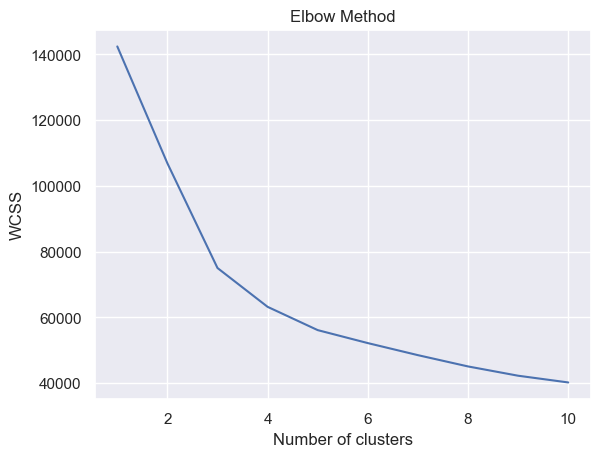

In [39]:
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [40]:
def summarize_clusters(labels):
    df_labels = pd.DataFrame(index = df_clust.index, data = labels, columns = ['labels'])
    groupby_mean = pd.merge(df_labels, df, left_index=True, right_index=True).groupby('labels').mean()
    for col in ['BirthYear', 'EducDeg', 'GeoLivArea', 'Children']:
        groupby_mean[col] = [round(i) for i in groupby_mean[col]]
    groupby_mean['EducDeg'] = ['PhD' if i==4 else 'BSc/MSc' if i==3 else 'High School' if i== 2 else 'Basic' for i in groupby_mean['EducDeg']]

    return groupby_mean

In [41]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++').fit(df_clust)
kmeans_labels = kmeans.labels_

# summarize_clusters(kmeans.labels_)

In [42]:
from sklearn.manifold import TSNE
import plotly.express as px

C:\Users\david\anaconda3\lib\site-packages\xarray\core\pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
C:\Users\david\anaconda3\lib\site-packages\xarray\core\pycompat.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion("0.0.0")
C:\Users\david\anaconda3\lib\site-packages\xarray\core\pycompat.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion("0.0.0")
C:\Users\david\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\david\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use 

In [43]:
# labels = kmeans_labels

# features = df_pca.iloc[:, -5:]

# tsne = TSNE(n_components=3, random_state=0)
# projections = tsne.fit_transform(features, )

# fig = px.scatter_3d(
#     projections, x=0, y=1, z=2,
#     color=labels, labels={'color': 'label'}
# )
# fig.update_traces(marker_size=8)
# fig.show()

T-SNE
UMAP
SOM

# Density Based Clustering
## Mean Shift Clustering

In [44]:
pca_features = df_pca.iloc[:, 12:]

In [45]:
from os.path import join
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth

In [46]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

In [47]:
# The following bandwidth can be automatically detected using (we need to set quantile though)
# Based on distance to nearest neighbors for all observations
bandwidth = estimate_bandwidth(df_pca, quantile=0.06, random_state=1, n_jobs=-1)
bandwidth

2.361912630161085

In [48]:
# Perform mean-shift clustering with bandwidth set using estimate_bandwidth
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=4)
ms_labels = ms.fit_predict(df_pca)

ms_n_clusters = len(np.unique(ms_labels))
print("Number of estimated clusters : %d" % ms_n_clusters)

Number of estimated clusters : 5


In [49]:
# Concatenating the labels to df
df_concat = pd.concat([df_pca, pd.Series(ms_labels, index=df.index, name="ms_labels")], axis=1)

In [50]:
# Computing the R^2 of the cluster solution
sst = get_ss(df_pca)  # get total sum of squares
ssw_labels = df_concat.groupby(by='ms_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2, "Proportion of explained variance")

Cluster solution with R^2 of 0.4620 Proportion of explained variance


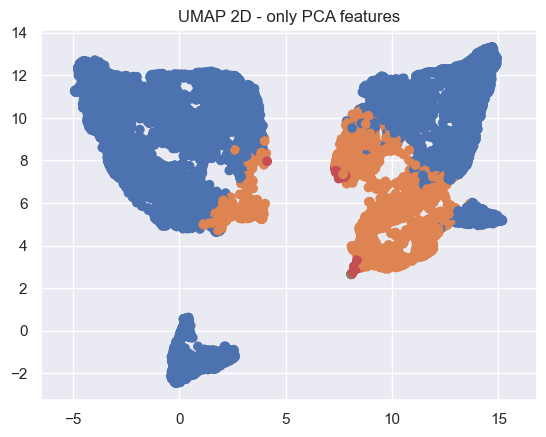

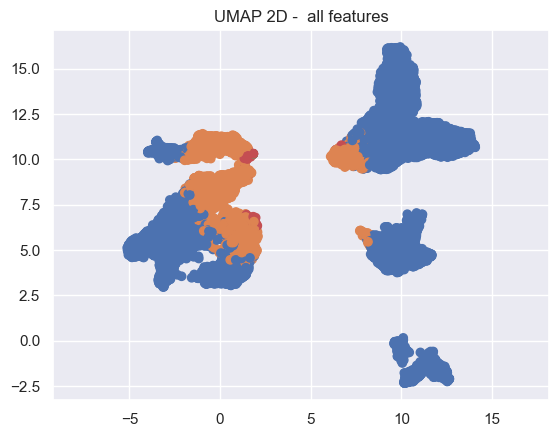

In [52]:
import umap


# UMAP 2D - only PCA features
reducer = umap.UMAP()
embedding2_pca = reducer.fit_transform(pca_features)

#UMAP 2D -  all features
reducer = umap.UMAP()
embedding2_all = reducer.fit_transform(df_pca)

plt.scatter(
    embedding2_pca[:, 0],
    embedding2_pca[:, 1],
    c=[sns.color_palette()[x] for x in ms_labels])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP 2D - only PCA features')
plt.show()

# with all features

plt.scatter(
    embedding2_all[:, 0],
    embedding2_all[:, 1],
    c=[sns.color_palette()[x] for x in ms_labels])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP 2D -  all features')
plt.show()



In [56]:
# #Add the cluster labels to the cleaned and unscaled dataframe
df["ms_label"] = ms_labels.tolist()
#look at the mean values per cluster to interpret them 
df.groupby(["ms_label"]).mean()

,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,TotalPrem
ms_label,,,,,,,,,,,,
0,1964.495810,2.693051,2687.867449,2.706072,0.722057,0.676906,350.601694,111.220736,163.931900,25.703452,25.115734,677.340236
1,1978.432115,1.842037,1945.179373,2.706701,0.659269,0.690875,136.608667,437.816155,181.896203,77.638279,76.769050,972.283325
2,1969.000000,2.500000,2725.000000,4.000000,1.000000,0.990000,521.765000,636.525000,38.675000,1.945000,10.835000,17479.020000
3,1974.653333,1.680000,2154.013333,2.800000,0.573333,0.595467,108.828000,630.727333,139.516667,49.030667,44.697000,1584.368667
4,1949.000000,2.000000,2642.000000,2.000000,1.000000,0.990000,424.190000,636.525000,118.690000,15.670000,41.450000,4730.700000


# Density Based Clustering
## DBSCAN

In [ ]:
# K-distance graph to find out the right eps value
neigh = NearestNeighbors(n_neighbors=20)
neigh.fit(df_pca)
distances, _ = neigh.kneighbors(df_pca)
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.show()

In [ ]:
#ε- the neighborhood radius: EPS
#MinPts — the neighborhood density threshold: MinSamples
#https://towardsdatascience.com/a-practical-guide-to-dbscan-method-d4ec5ab2bc99

dbscan = DBSCAN(eps=18, min_samples=3, n_jobs=4)
dbscan_labels = dbscan.fit_predict(df)

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("eps", i, "Number of estimated clusters : %d" % dbscan_n_clusters)

In [ ]:
# Concatenating the labels to df
df_concat = pd.concat([df, pd.Series(dbscan_labels, index=df.index, name="dbscan_labels")], axis=1)
df_concat.head()

In [ ]:
# Detecting noise (potential outliers)
df_concat.loc[df_concat['dbscan_labels'] == -1]

In [ ]:
# Computing the R^2 of the cluster solution
df_nonoise = df_concat.loc[df_concat['dbscan_labels'] != -1]
sst = get_ss(df)  # get total sum of squares
ssw_labels = df_nonoise.groupby(by='dbscan_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

# Density Based Clustering
## GMM (Gaussian Mixture Model )

In [65]:
# Performing GMM clustering
gmm = GaussianMixture(n_components=4, covariance_type='full', n_init=10, init_params='kmeans', random_state=1)
gmm_labels = gmm.fit_predict(df)
labels_proba = gmm.predict_proba(df)

In [66]:
# The estimated mean vectors of the Components
gmm.means_

array([[1.96221975e+03, 2.74815883e+00, 2.80950952e+03, 2.71037438e+00,
        6.57523733e-01, 6.64835794e-01, 3.76075687e+02, 9.42190672e+01,
        1.52976643e+02, 2.04731116e+01, 2.00027991e+01, 6.63747307e+02,
        0.00000000e+00],
       [1.97277933e+03, 1.88108402e+00, 2.25331018e+03, 2.72265439e+00,
        4.51904548e-01, 7.20970713e-01, 1.33749067e+02, 3.61850059e+02,
        1.79872375e+02, 8.49486790e+01, 8.33183977e+01, 8.82462096e+02,
        8.85906207e-01],
       [1.98406829e+03, 1.63629590e+00, 1.62384712e+03, 2.67527101e+00,
        6.49715929e-01, 6.17764219e-01, 9.69566741e+01, 6.35256304e+02,
        1.43321938e+02, 7.30757808e+01, 7.06654638e+01, 1.39955300e+03,
        1.33043088e+00],
       [1.97626252e+03, 2.33658500e+00, 2.06031888e+03, 2.69580268e+00,
        1.00000000e+00, 7.08015669e-01, 2.35239346e+02, 2.52590571e+02,
        2.05820300e+02, 4.90723729e+01, 4.87628622e+01, 7.91485452e+02,
        3.28592134e-01]])

In [67]:
# The estimated covariance matrices of the Components
gmm.covariances_.shape

(4, 13, 13)

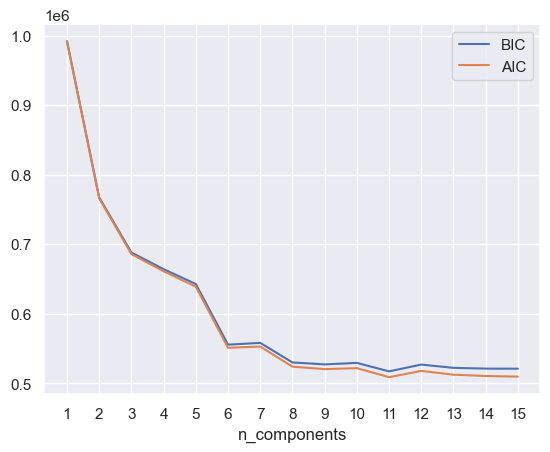

In [68]:
# Selecting number of components based on AIC and BIC
n_components = np.arange(1, 16)
models = [GaussianMixture(n, covariance_type='full', n_init=10, random_state=1).fit(df)
          for n in n_components]

bic_values = [m.bic(df) for m in models]
aic_values = [m.aic(df) for m in models]
plt.plot(n_components, bic_values, label='BIC')
plt.plot(n_components, aic_values, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.xticks(n_components)
plt.show()

In [81]:
# Performing GMM clustering
gmm = GaussianMixture(n_components=3, covariance_type='full', n_init=10, init_params='kmeans', random_state=1)
gmm_labels = gmm.fit_predict(df)

# Concatenating the labels to df
df_concat = pd.concat([df, pd.Series(gmm_labels, index=df.index, name="gmm_labels")], axis=1)
df_concat.head()

,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,TotalPrem,ms_label,gmm_labels
CustID,,,,,,,,,,,,,,
1.0,1982,2,2177.0,1,1,0.39,375.85,79.45,146.36,47.01,16.89,665.56,0,2
2.0,1995,2,677.0,4,1,1.12,77.46,416.20,116.69,125.19,106.13,910.96,1,0
3.0,1970,1,2277.0,3,0,0.28,206.15,224.50,124.58,86.35,99.02,740.60,1,0
4.0,1981,3,1099.0,4,1,0.99,182.48,43.35,311.17,35.34,28.34,600.68,0,2
5.0,1973,3,1763.0,4,1,0.90,338.62,47.80,182.59,18.78,41.45,629.24,0,2


In [82]:
# Computing the R^2 of the cluster solution
sst = get_ss(df)  # get total sum of squares
ssw_labels = df_concat.groupby(by='gmm_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.1371


In [85]:
# #Add the cluster labels to the cleaned and unscaled dataframe
#look at the mean values per cluster to interpret them 
gmm=df_concat["gmm_labels"]
df_concat.groupby(["gmm_labels"]).mean()

,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,TotalPrem,ms_label
gmm_labels,,,,,,,,,,,,,
0,1975.666992,1.920527,2094.236470,2.699171,0.649439,0.711404,149.653659,373.033337,189.377720,77.631895,76.740450,890.548385,0.926865
1,1984.231579,1.627368,1618.766737,2.675789,0.650526,0.614968,95.251621,635.177105,142.553600,74.184379,70.829827,1396.625663,1.326316
2,1964.560799,2.700670,2685.061102,2.711187,0.725779,0.675012,353.751769,111.904088,163.553352,24.586658,24.137582,677.933450,0.000000


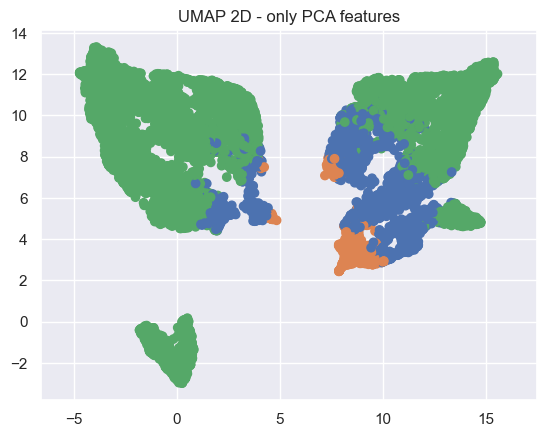

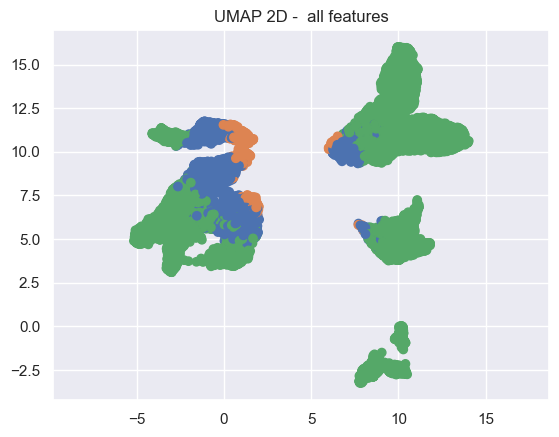

In [84]:
import umap


# UMAP 2D - only PCA features
reducer = umap.UMAP()
embedding2_pca = reducer.fit_transform(pca_features)

#UMAP 2D -  all features
reducer = umap.UMAP()
embedding2_all = reducer.fit_transform(df_pca)

plt.scatter(
    embedding2_pca[:, 0],
    embedding2_pca[:, 1],
    c=[sns.color_palette()[x] for x in gmm])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP 2D - only PCA features')
plt.show()

# with all features

plt.scatter(
    embedding2_all[:, 0],
    embedding2_all[:, 1],
    c=[sns.color_palette()[x] for x in gmm])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP 2D -  all features')
plt.show()



In [95]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        #ax[0].annotate(s=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy', text="kk") 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.show()

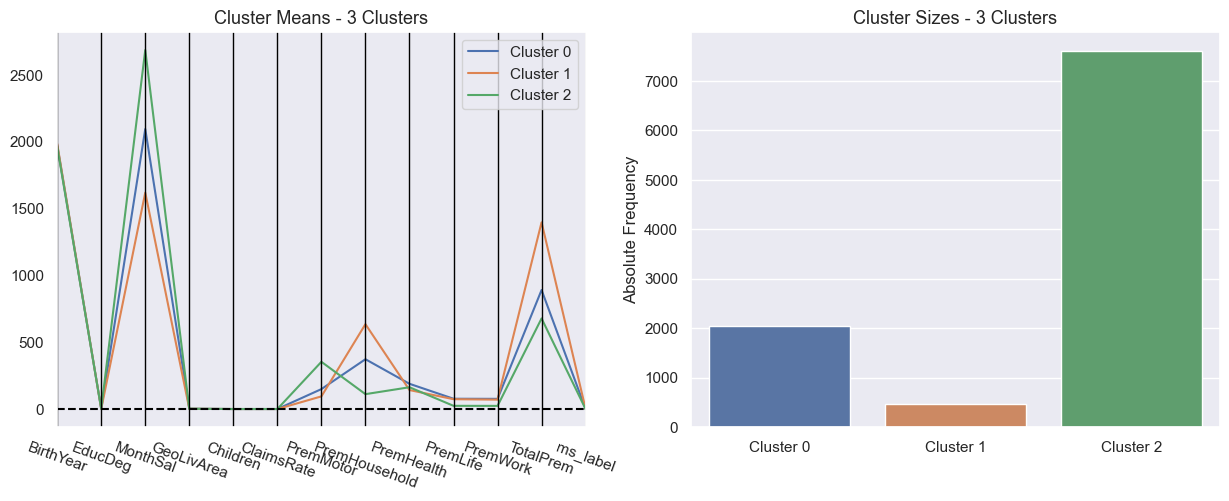

In [106]:
# Profilling each cluster (product, behavior, merged)

cluster_profiles(df=df_concat, label_columns = ['gmm_labels'],figsize = (15, 5),compar_titles = ["Müllscheiße"])